<center><h2> LetsGrowMore - Data Analyst Intern 📈📊  </h2></center>
<center><h3> Beginner Level Task - 2 🎯 </h3></center><br/>
<center><h1> Stock Price Prediction and Forecasting <br/>Using Stacked LSTM 💹 </h1></center><br/>
<center><h3> Hemanth Karthick 😊 <h3></center>

********
## Importing Libraries 📚

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler

*****
## Load Dataset 

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
df = df.dropna()
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


********

<center> <h1> Exploratory Data Analysis 👨🏻‍💻</h1>
    
*******
    
<center> <h3> Description of the Dataframe </h3> </center>

In [46]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [47]:
# returns dimensions
df.shape

(2035, 8)

In [48]:
df.size 

16280

In [49]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034],
           dtype='int64', length=2035)

In [50]:
# returns column name
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [51]:
df_close = df['Close']
df_close.shape

(2035,)

In [52]:
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [53]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

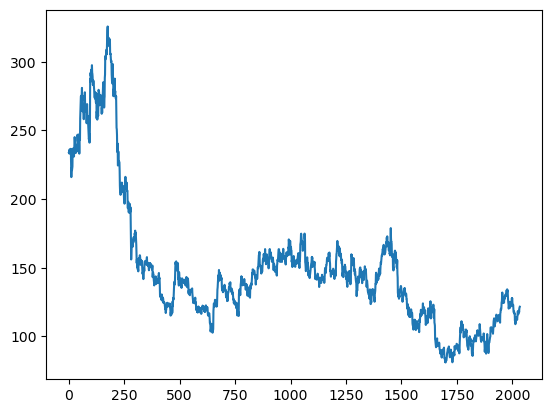

In [54]:
plt.plot(df_close)

<center> <h3> Data types of the Dataframe </h3> </center>

In [55]:
df.info()                                                          # reveals datatypes of the column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 143.1+ KB


******
<center><h2>Data Visualization Models 📉</h2></center>

******

<br />

+ #### Plot
+ #### Histogran
+ #### Pairplot

In [96]:
#libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

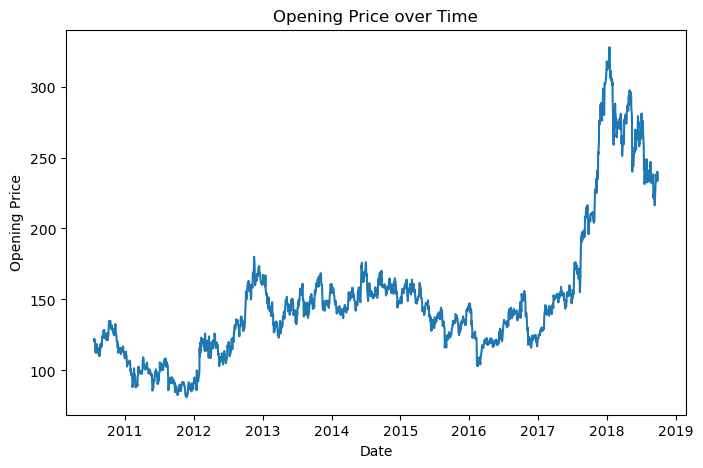

In [57]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(8,5))
plt.plot(df.Date, df.Open)
plt.title('Opening Price over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.show()

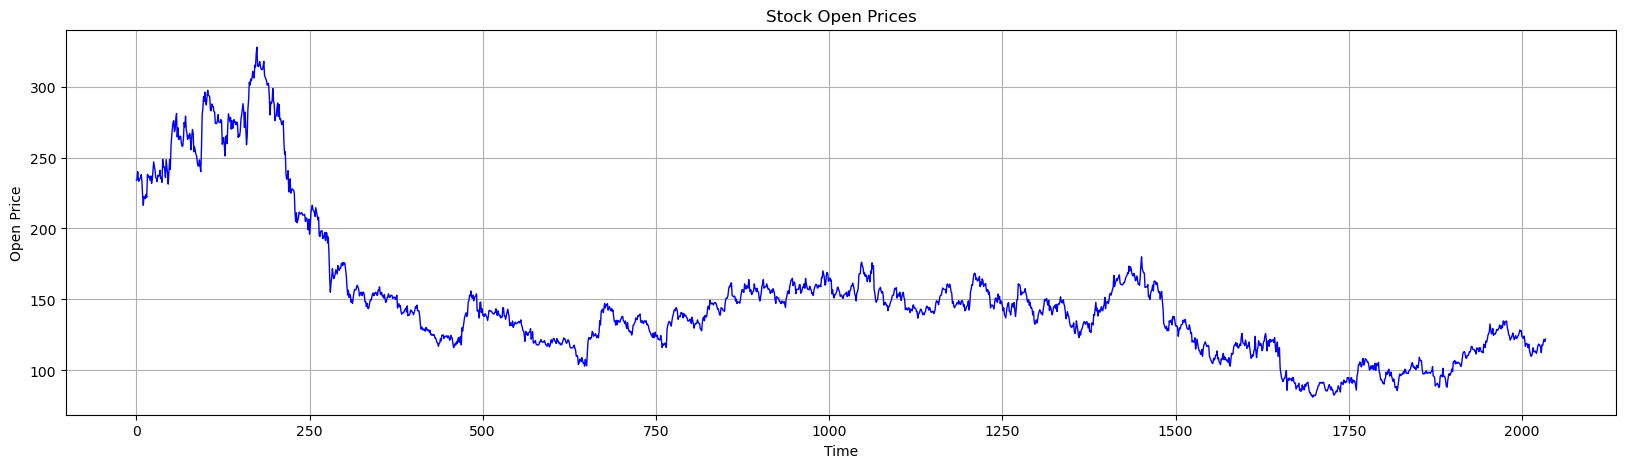

In [58]:
# Set figure size
plt.figure(figsize=(20, 5))

# Plot the 'Open' column
plt.plot(df['Open'], linewidth=1, color='blue')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Stock Open Prices')
plt.grid(True)

# Display the plot
plt.show()

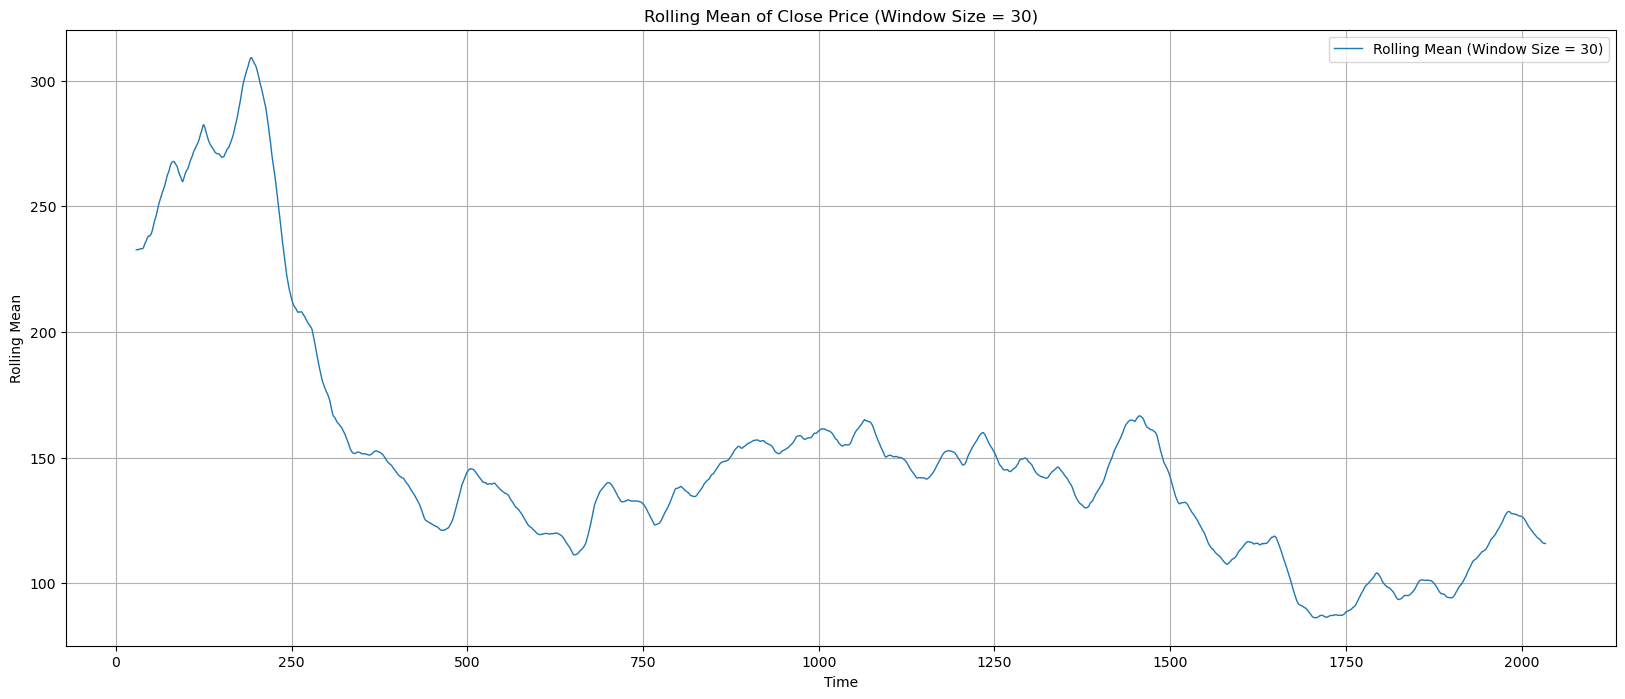

In [59]:
rolling_mean = df['Close'].rolling(window=30).mean()

#Plot the rolling mean
plt.figure(figsize=(20, 8))
plt.plot(rolling_mean, linewidth=1, label='Rolling Mean (Window Size = 30)')
plt.xlabel('Time')
plt.ylabel('Rolling Mean')
plt.title('Rolling Mean of Close Price (Window Size = 30)')
plt.legend()
plt.grid(True)

plt.show()

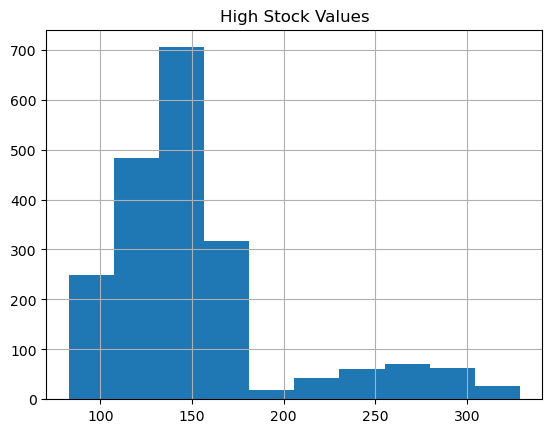

In [60]:
# Histogram of High Values
plt.hist(df['High'])
plt.grid()
plt.title("High Stock Values")
plt.show()

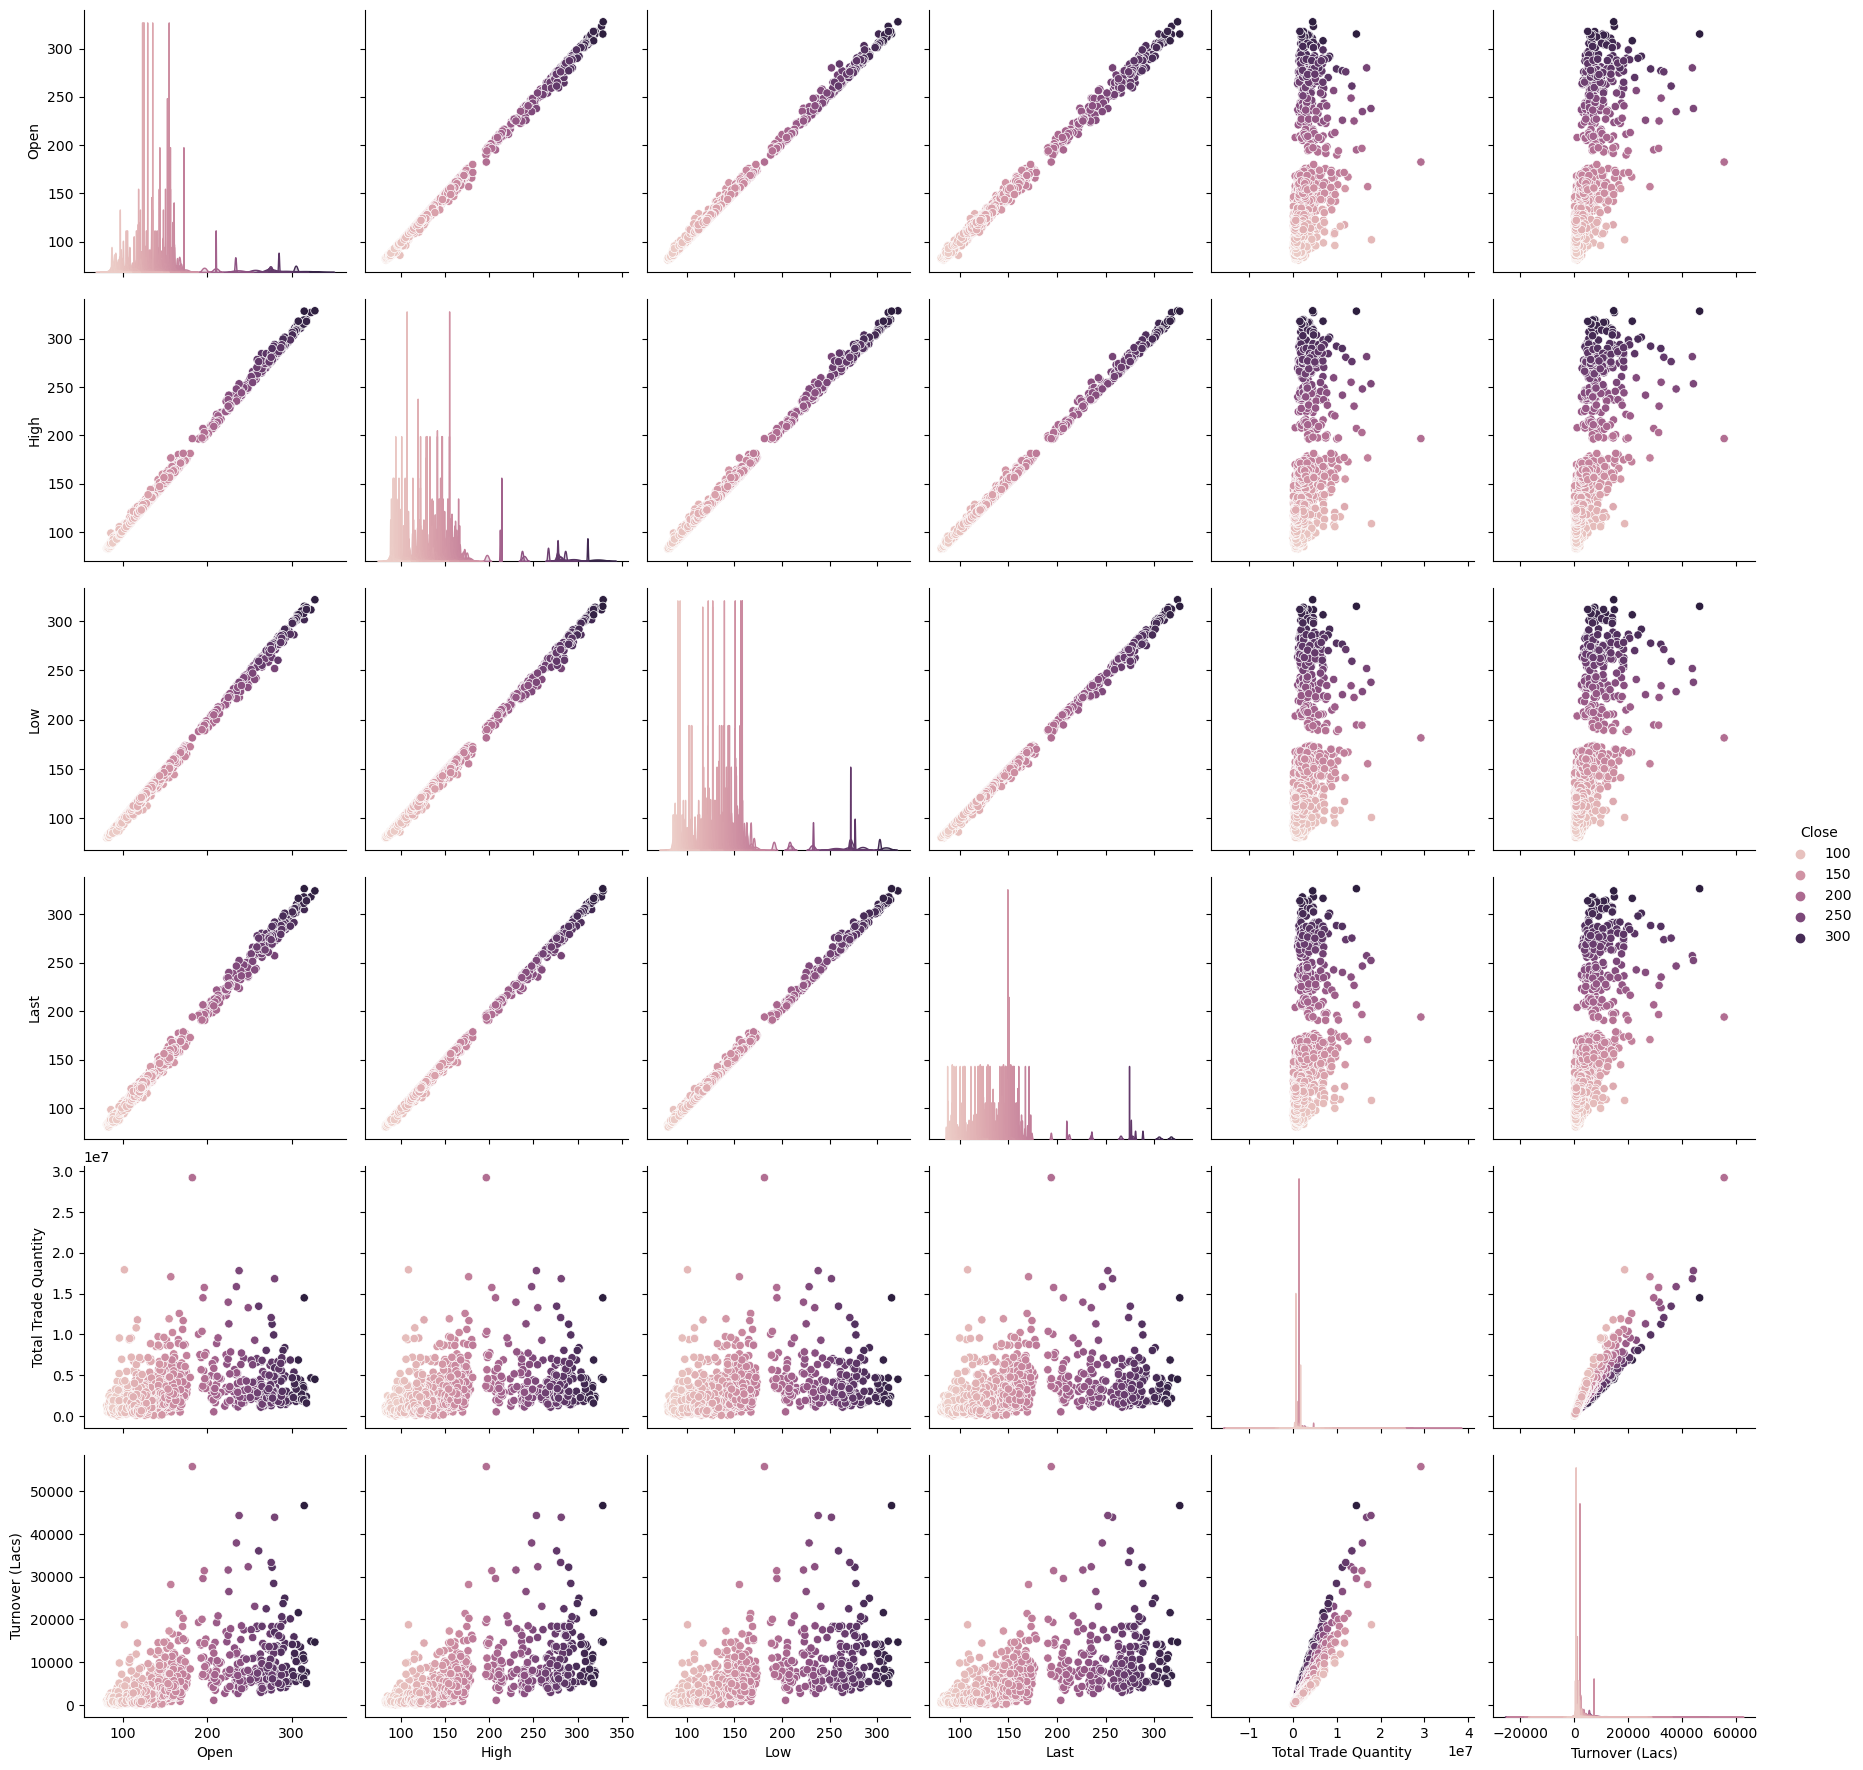

In [61]:
sns.pairplot(hue ='Close',data=df,height=3)

In [62]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


*********
<center><h2> Data Processing 📊 </center>


In [100]:
#Import Libraries
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from keras.layers import Dropout

In [64]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

#Split the data into train and test split
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [65]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

*********
<center><h2>Model Training</h2></center>

In [66]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [67]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [68]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 13s 225ms/step - loss: 0.0269 - val_loss: 0.0096
Epoch 2/100
23/23 [==============================] - 4s 171ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 3/100
23/23 [==============================] - 4s 170ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 4/100
23/23 [==============================] - 4s 170ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/100
23/23 [==============================] - 4s 173ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 6/100
23/23 [==============================] - 4s 173ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/100
23/23 [==============================] - 4s 174ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 8/100
23/23 [==============================] - 4s 176ms/step - loss: 0.0011 - val_loss: 8.5366e-04
Epoch 9/100
23/23 [==============================] - 4s 179ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 10/100
23/23 [==============================] - 4s 175ms/step - loss: 0.0012 - v

23/23 [==============================] - 4s 159ms/step - loss: 2.9210e-04 - val_loss: 3.2345e-04
Epoch 77/100
23/23 [==============================] - 4s 161ms/step - loss: 2.6516e-04 - val_loss: 2.4145e-04
Epoch 78/100
23/23 [==============================] - 4s 162ms/step - loss: 2.6697e-04 - val_loss: 2.9439e-04
Epoch 79/100
23/23 [==============================] - 4s 162ms/step - loss: 2.7212e-04 - val_loss: 3.0162e-04
Epoch 80/100
23/23 [==============================] - 4s 159ms/step - loss: 2.7432e-04 - val_loss: 2.2371e-04
Epoch 81/100
23/23 [==============================] - 4s 163ms/step - loss: 3.0448e-04 - val_loss: 2.8830e-04
Epoch 82/100
23/23 [==============================] - 4s 164ms/step - loss: 2.9295e-04 - val_loss: 1.9747e-04
Epoch 83/100
23/23 [==============================] - 4s 179ms/step - loss: 2.8023e-04 - val_loss: 2.4559e-04
Epoch 84/100
23/23 [==============================] - 4s 161ms/step - loss: 2.4341e-04 - val_loss: 1.9038e-04
Epoch 85/100
23/23 [===

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 207.6 KB


*********
<center> <h2> Prediciton and Performance Metrics</center>

In [97]:
#Predicting Performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

#Transformation
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

#Calculate RMSE Performance metrics
print(math.sqrt(mean_squared_error(y_train, train_predict)))

82.00314159126042


In [71]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

81.24576459158284

In [99]:
#Shift train prediction
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict


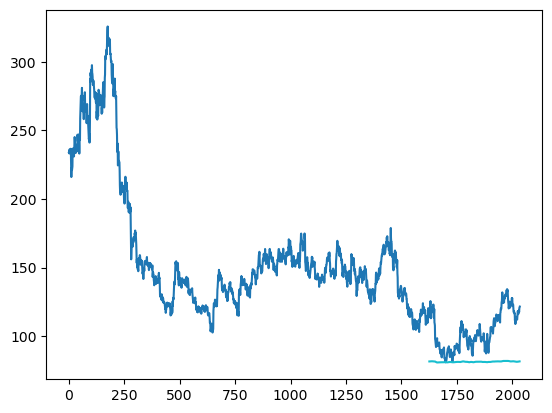

In [98]:
#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [73]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [74]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 302)

In [81]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# future days for prediction
days_future = 90

# past days that affects prediction
days_past = 7

lst_output=[]
n_steps=300
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>300):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.02246732 0.03125    0.02348856 0.0249183  0.02144608 0.04840686
 0.04575163 0.03962418 0.03921569 0.04758987 0.04513889 0.04166667
 0.04125817 0.05044935 0.05555556 0.05494281 0.05412582 0.0435049
 0.04799837 0.05147059 0.05065359 0.03431373 0.04575163 0.04187092
 0.04554739 0.03941993 0.02716503 0.03125    0.05882353 0.07148693
 0.08721405 0.08986928 0.10498366 0.08905229 0.10355392 0.10375817
 0.12275327 0.10906863 0.09660948 0.1064134  0.10457516 0.11049837
 0.1127451  0.09803922 0.09987745 0.08925654 0.0747549  0.08169935
 0.08925654 0.09068627 0.08129085 0.08823529 0.08455882 0.07945261
 0.08374183 0.07781863 0.09824346 0.09089052 0.09007353 0.09558824
 0.06862745 0.06372549 0.0494281  0.04799837 0.04534314 0.0443219
 0.03941993 0.0379902  0.04656863 0.05085784 0.07209967 0.06535948
 0.07230392 0.07802288 0.07741013 0.06086601 0.06413399 0.07046569
 0.05412582 0.0498366  0.05167484 0.05330882 0.0435049  0.02634804
 0.02410131 0.02961601 0.01960784 0.02961601 0.04575

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/lstm_3/transpose' defined at (most recent call last):
    File "C:\Users\Pushpalatha\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Pushpalatha\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelapp.py", line 728, in start
      self.io_loop.start()
    File "C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Pushpalatha\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\Pushpalatha\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\Pushpalatha\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Pushpalatha\AppData\Local\Temp\ipykernel_14700\2294150866.py", line 22, in <module>
      yhat = model.predict(x_input, verbose=0)
    File "C:\Users\Pushpalatha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1741, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\Pushpalatha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1577, in predict_function
      return step_function(self, iterator)
    File "C:\Users\Pushpalatha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1567, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Pushpalatha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1560, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\Pushpalatha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1533, in predict_step
      return self(x, training=False)
    File "C:\Users\Pushpalatha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 1044, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Pushpalatha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py", line 379, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Users\Pushpalatha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py", line 419, in call
      return self._run_internal_graph(
    File "C:\Users\Pushpalatha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py", line 555, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Pushpalatha\anaconda3\lib\site-packages\tensorflow\python\keras\layers\recurrent.py", line 668, in __call__
      return super(RNN, self).__call__(inputs, **kwargs)
    File "C:\Users\Pushpalatha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 1044, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Pushpalatha\anaconda3\lib\site-packages\tensorflow\python\keras\layers\recurrent.py", line 2802, in call
      return super(LSTM, self).call(
    File "C:\Users\Pushpalatha\anaconda3\lib\site-packages\tensorflow\python\keras\layers\recurrent.py", line 802, in call
      last_output, outputs, states = backend.rnn(
    File "C:\Users\Pushpalatha\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py", line 4249, in rnn
      inputs = nest.map_structure(swap_batch_timestep, inputs)
    File "C:\Users\Pushpalatha\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py", line 4246, in swap_batch_timestep
      return array_ops.transpose(input_t, axes)
Node: 'sequential_1/lstm_3/transpose'
transpose expects a vector of size 2. But input(1) is a vector of size 3
	 [[{{node sequential_1/lstm_3/transpose}}]] [Op:__inference_predict_function_19035]

In [82]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

df3 = df_close.tolist()
df3.extend(lst_output)

len(df_close)

2035

****

<center><h2> LSTM Stacked Algorithm </center>
    
******

In [76]:
model = Sequential()
model.add(LSTM(units=32, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) # the input shape is [1] for memory holding and [2] to include all features
model.add(LSTM(units=16, activation='relu', return_sequences=False))
model.add(Dropout(0.1)) # deactivating neurons randomly to reduce any overfitting
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse') # output
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 7, 32)             5120      
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8,273
Trainable params: 8,273
Non-trainable params: 0
_________________________________________________________________


In [79]:
history = model.fit(X_train, y_train, shuffle=True, epochs=20, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/20
110/110 [==============================] - 1s 8ms/step - loss: 0.1553 - val_loss: 0.1103
Epoch 2/20
110/110 [==============================] - 1s 7ms/step - loss: 0.1623 - val_loss: 0.1434
Epoch 3/20
110/110 [==============================] - 1s 7ms/step - loss: 0.1744 - val_loss: 0.1143
Epoch 4/20
110/110 [==============================] - 1s 7ms/step - loss: 0.1637 - val_loss: 0.0845
Epoch 5/20
110/110 [==============================] - 1s 7ms/step - loss: 0.1524 - val_loss: 0.0735
Epoch 6/20
110/110 [==============================] - 1s 7ms/step - loss: 0.1510 - val_loss: 0.1074
Epoch 7/20
110/110 [==============================] - 1s 7ms/step - loss: 0.1588 - val_loss: 0.1031
Epoch 8/20
110/110 [==============================] - 1s 7ms/step - loss: 0.1641 - val_loss: 0.1853
Epoch 9/20
110/110 [==============================] - 1s 7ms/step - loss: 0.1576 - val_loss: 0.0959
Epoch 10/20
110/110 [==============================] - 1s 7ms/step - loss: 0.1617 - val_loss: 0.1133

In [81]:
forecast_dates = pd.date_range(list(df['Date'])[0], periods=days_future, freq='1d').tolist()

forecast = model.predict(X_train[days_future-1::-1]) # produces a days_future x 1 array for the predictions of the desired dates
forecast_copies = np.repeat(forecast, df_scaled.shape[1], axis=1) # become days_future x no.columns of orginal dataframe in order to fit the original input array
prediction = scaler.inverse_transform(forecast_copies)[:,0]

df_prediction = pd.DataFrame({'Date':forecast_dates, 'Open':prediction})
df_prediction

3/3 [==============================] - 2s 18ms/step


,Date,Open
0,2018-09-28,278.978699
1,2018-09-29,272.794189
2,2018-09-30,269.741180
3,2018-10-01,276.279205
4,2018-10-02,271.034302
...,...,...
85,2018-12-22,294.050415
86,2018-12-23,282.751801
87,2018-12-24,284.164246
88,2018-12-25,286.833496


<center> <h2> Final Prediction Graph 📈

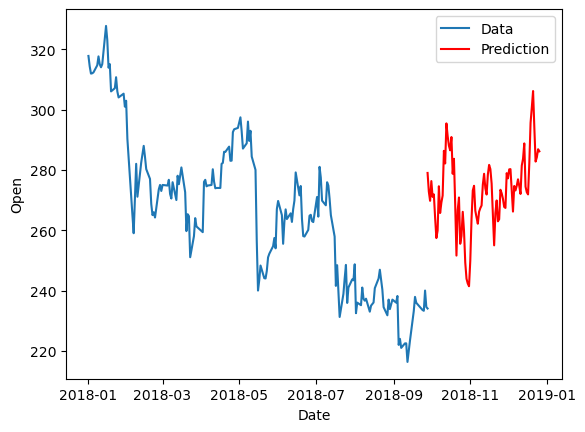

In [83]:
df = df.loc[df['Date'] >= '2018']
plt.plot(df['Date'], df['Open'], label='Data')
plt.plot(df_prediction['Date'], df_prediction['Open'], color='red', label='Prediction')
plt.xlabel('Date')
plt.ylabel('Open')
plt.legend()

plt.show()
